In [1]:
import pandas as pd 
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
df_cat = df.select_dtypes("category")
df_cat.head(3)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner


In [11]:
df.num = df.select_dtypes("float64" ,"int64")
df.num.head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


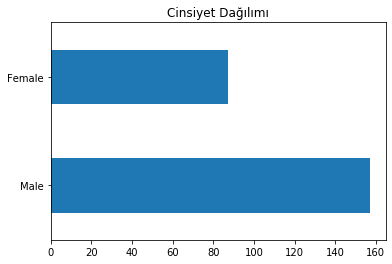

In [16]:
(df["sex"]
 .value_counts()
 .plot.barh()
 .set_title("Cinsiyet Dağılımı"));

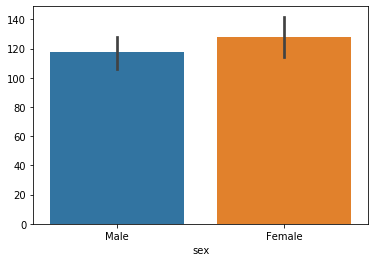

In [28]:
sns.barplot(data = df , x = "sex"  , y = df.sex.index);



In [22]:
df.sex.index

RangeIndex(start=0, stop=244, step=1)

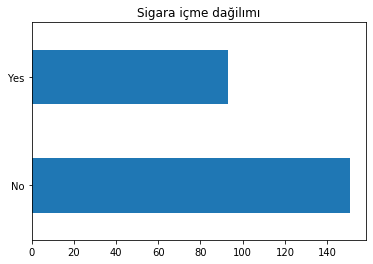

In [18]:
(df.smoker
.value_counts().
plot.barh()
.set_title("Sigara içme dağilımı"));

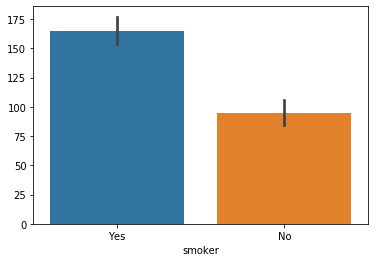

In [29]:
sns.barplot(data = df , x = "smoker" , y = df.smoker.index)

In [32]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

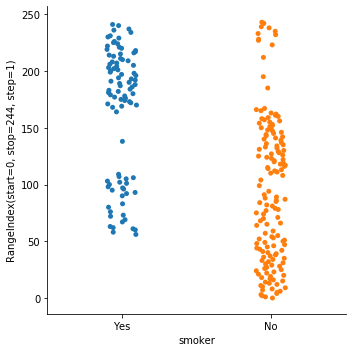

In [35]:
sns.catplot(data = df , x = "smoker" ,y = df.smoker.index);
#saçma index bazlı içen içmeyen grafiği oldu ama en azından denemiş oldum

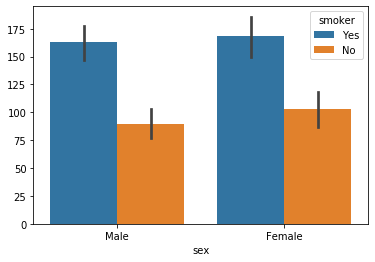

In [45]:
sns.barplot(data = df , x = "sex" ,y = df.sex.index , hue = "smoker");
# cinsiyete göre sigara içilme oranı 

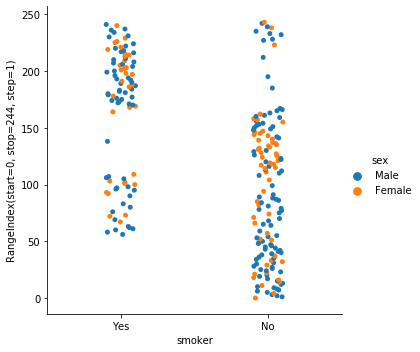

In [50]:
sns.catplot(data = df , x = "smoker" ,y = df.smoker.index , hue = "sex") # 

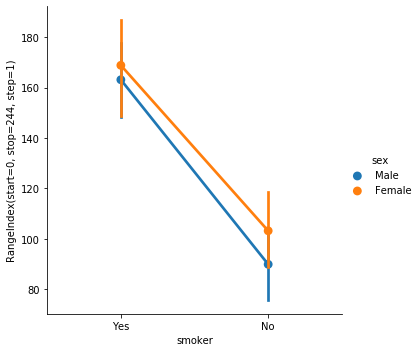

In [51]:
sns.catplot(data = df , x = "smoker" ,y = df.smoker.index , hue = "sex" , kind= "point")

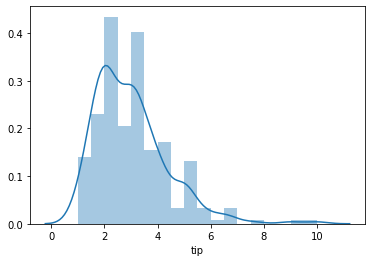

In [55]:
sns.distplot(df.tip )

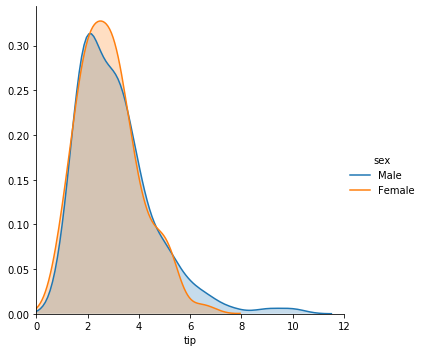

In [64]:
(sns
.FacetGrid(
        data = df,
        hue = "sex",
        height = 5,
        xlim = (0,12)
    )
.map(sns.kdeplot , "tip" ,shade = True)
.add_legend()

);
# grafiğe bakılarak kadınların 8 dolardan fazla bağşiş vermediği gözlemleniyor , ve bahşir ortalamsındaki 3 değeri bunların oluşturduğu faktorlerden geliyor 

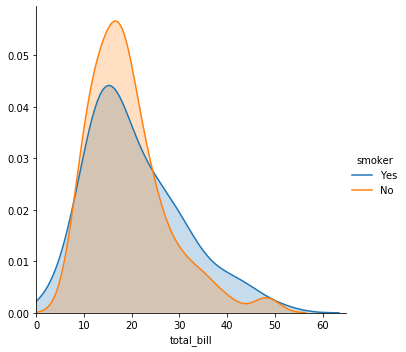

In [77]:
(sns
.FacetGrid(
        data = df,
        hue = "sex",
        
        height = 5,
        xlim = (0 ,65)
        )

 .map(sns.kdeplot, "total_bill"  , shade = True)
 .add_legend()
);
#grafiğe bakılarak erkaklerin daha fazla hesap odediği gözüküyor

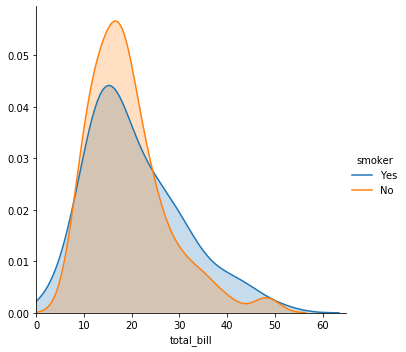

In [78]:
(sns
.FacetGrid(
        data = df,
        hue = "smoker",
        
        height = 5,
        xlim = (0 ,65)
        )

 .map(sns.kdeplot, "total_bill"  , shade = True)
 .add_legend()
);

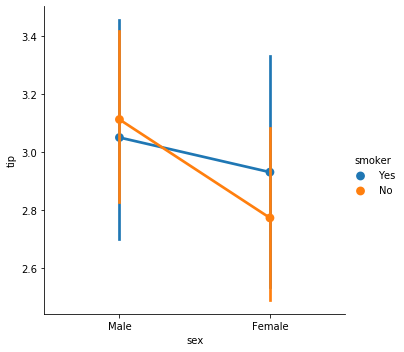

In [92]:
sns.catplot(data = df , x = "sex" ,y = "tip" , hue = "smoker" , kind= "point" );
# grafiğe bakarak sigara içmeyen erkeklerin daha fazla bahşiş verdiği gözlemleniyor ve ,
# ama standart sapmalara cok dikkat değerler birbirine yakın !!!
# ci 11 i kendim ekledım boyle daha anlaşılır oldu :)

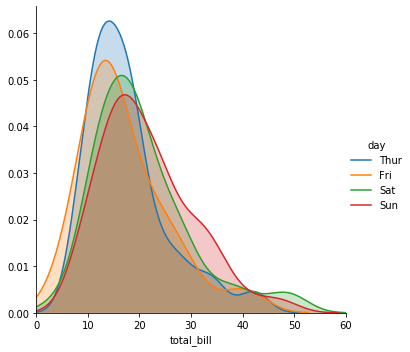

In [107]:
(sns
.FacetGrid(
    data = df,
    hue = "day",
    height = 5,
    xlim = (0 ,60)
    )
 
 .map(sns.kdeplot , "total_bill" , shade = True)
.add_legend()
);
# hangi günler ne kadar kazanılmış grafik 

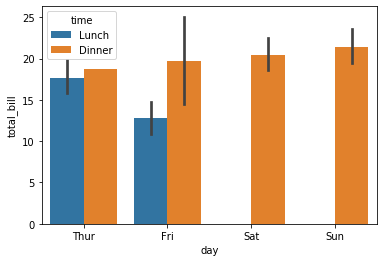

In [109]:
sns.barplot(data = df , x = "day" , y = "total_bill" , hue = "time");
# hangi gün hangi öğünden ne kadar kazanılmış 


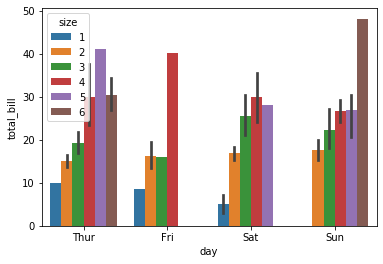

In [111]:
sns.barplot(data = df , x = "day" , y = "total_bill" ,hue = "size")
# günlere göre müşteri sayısınca kaç para bırktığı 

#  BoxPLot Kutu Grafiği

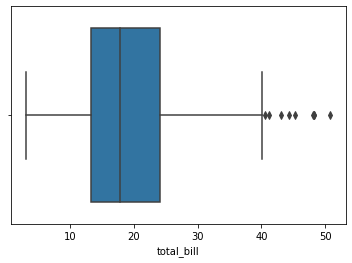

In [114]:
sns.boxplot(data = df , x = "total_bill");
# burada toplam kazan ortalamasını aldık mavinin oradaki ilk cizdi %25lik kısım 
# orasındaki cizgi isle median(yani ortalama değeridi , cızgı dışı yoktalarsa aykırı gözlemdir)

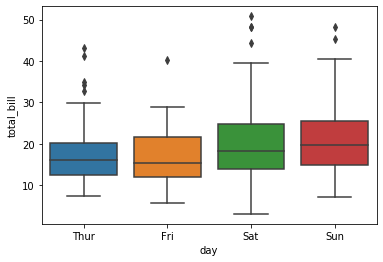

In [116]:
# Hangi günler daha fazla kazanıyoruz  ? 
sns.boxplot(data = df, x= "day" , y= "total_bill");

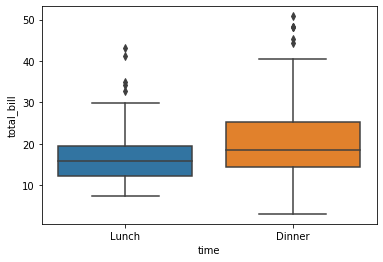

In [117]:
# Sabah mı akşam mı daha cok kazanıyoruz ? 

sns.boxplot(data = df , x = "time" , y= "total_bill")

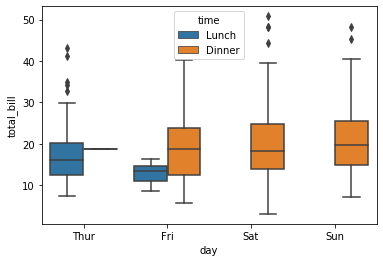

In [120]:
# Günlere göre sabah ve akşam satışlarımızın durumu ? 
sns.boxplot(data = df , x = "day" , y = "total_bill" , hue = "time");

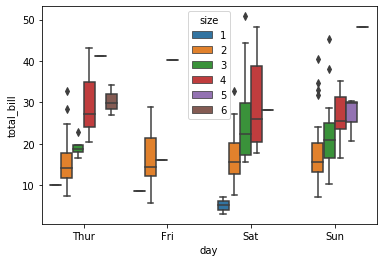

In [124]:
#Günlere göre kişi sayısına oranlar kazancımız nedir ? 
sns.boxplot(data = df , x = "day" , y = "total_bill" ,hue = "size");